<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [13]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 134.4 MB/s eta 0:00:0000:01


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [5]:
print("Column Names and Data Types:")
print(df.dtypes)
print("\n" + "-"*50)

# 2. Display summary info (non-null counts and memory usage)
print("DataFrame Info:")
df.info()
print("\n" + "-"*50)

# 3. Display shape of the dataset
print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\n" + "-"*50)

# 4. Display basic summary statistics for numerical columns
print("Summary Statistics for Numeric Columns:")
print(df.describe())


Column Names and Data Types:
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

--------------------------------------------------
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB

--------------------------------------------------
Dataset Shape: 65437 rows × 114 columns

--------------------------------------------------
Summary Statistics for Numeric Columns:
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [6]:
## Write your code here
import pandas as pd

# Step 1: Identify missing values
print("Missing Values Per Column:")
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])
print("\nTotal Missing Values in Dataset:", df.isnull().sum().sum())

# Step 2: Optionally view percentage of missing values
print("\nMissing Values (Percentage):")
missing_percent = (df.isnull().mean() * 100).round(2)
print(missing_percent[missing_percent > 0])

# Step 3: Decide how to handle missing values
# Example: Fill categorical columns with mode and drop rows with critical missing values

# Define critical columns to drop if missing
critical_cols = ['Employment', 'JobSat', 'RemoteWork']
df.dropna(subset=critical_cols, inplace=True)

# Fill missing values for common columns with mode or median
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    elif pd.api.types.is_numeric_dtype(df[col]):
        df[col].fillna(df[col].median(), inplace=True)

# Step 4: Confirm no missing data remains
print("\n✅ Missing Data After Handling:")
print(df.isnull().sum().sum(), "missing values remaining.")


Missing Values Per Column:
RemoteWork             10631
CodingActivities       10971
EdLevel                 4653
LearnCode               4949
LearnCodeOnline        16200
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 109, dtype: int64

Total Missing Values in Dataset: 2890957

Missing Values (Percentage):
RemoteWork             16.25
CodingActivities       16.77
EdLevel                 7.11
LearnCode               7.56
LearnCodeOnline        24.76
                       ...  
JobSatPoints_11        55.00
SurveyLength           14.14
SurveyEase             14.06
ConvertedCompYearly    64.19
JobSat                 55.49
Length: 109, dtype: float64


/tmp/ipykernel_299/2190736575.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_299/2190736575.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us


✅ Missing Data After Handling:
0 missing values remaining.


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [7]:
## Write your code here
# Step 1: Employment distribution
print("📊 Employment Type Distribution:")
print(df['Employment'].value_counts(dropna=False))
print("\n" + "-"*50)

# Step 2: Job Satisfaction distribution
print("📊 Job Satisfaction Distribution:")
print(df['JobSat'].value_counts(dropna=False))
print("\n" + "-"*50)

# Step 3: Years of Professional Coding Experience distribution
print("📊 Years of Professional Coding Experience Distribution:")
print(df['YearsCodePro'].value_counts(dropna=False).sort_index())


📊 Employment Type Distribution:
Employment
Employed, full-time                                                                                                                    22534
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                2291
Independent contractor, freelancer, or self-employed                                                                                    1244
Employed, part-time                                                                                                                      533
Employed, full-time;Student, part-time                                                                                                   509
                                                                                                                                       ...  
Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


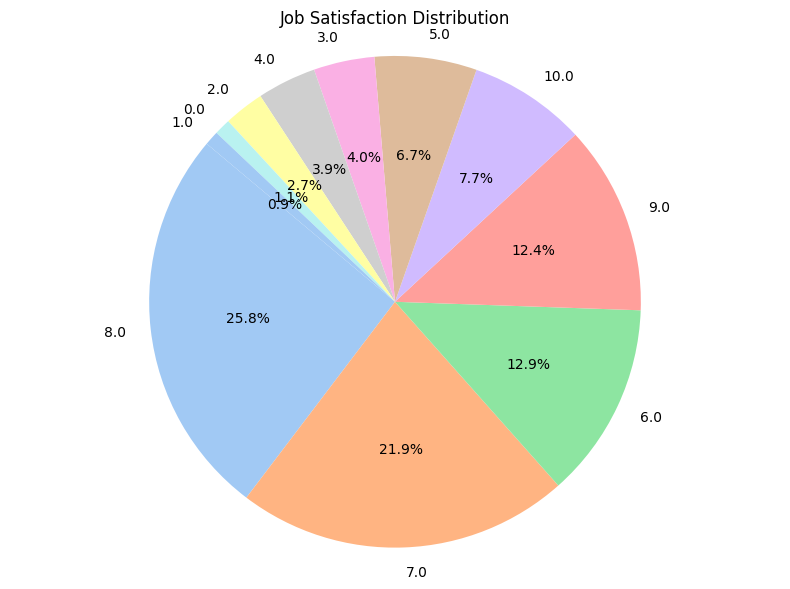

In [8]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Drop missing JobSat values
df_jobsat = df.dropna(subset=['JobSat'])

# Step 2: Plot a pie chart
job_sat_counts = df_jobsat['JobSat'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(job_sat_counts, labels=job_sat_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Job Satisfaction Distribution')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.tight_layout()
plt.show()


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


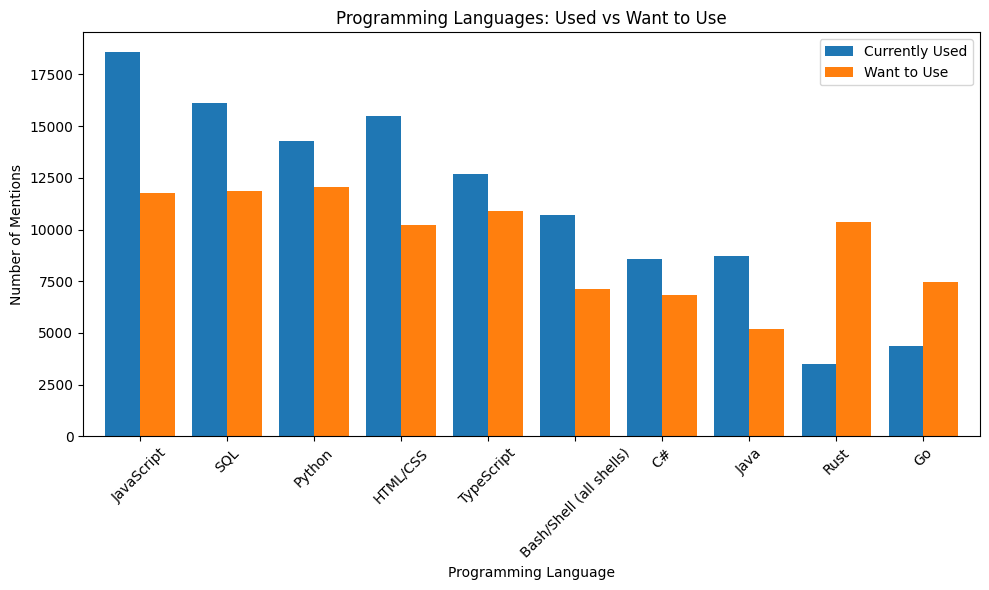

In [10]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Drop missing values
df_langs = df.dropna(subset=['LanguageHaveWorkedWith', 'LanguageWantToWorkWith'])

# Step 2: Split languages into lists
df_langs['HaveWorkedWithList'] = df_langs['LanguageHaveWorkedWith'].str.split(';')
df_langs['WantToWorkWithList'] = df_langs['LanguageWantToWorkWith'].str.split(';')

# Step 3: Flatten and count frequencies
from collections import Counter

have_counter = Counter(lang.strip() for sublist in df_langs['HaveWorkedWithList'] for lang in sublist)
want_counter = Counter(lang.strip() for sublist in df_langs['WantToWorkWithList'] for lang in sublist)

# Step 4: Convert to DataFrame and merge
have_df = pd.DataFrame.from_dict(have_counter, orient='index', columns=['HaveUsed'])
want_df = pd.DataFrame.from_dict(want_counter, orient='index', columns=['WantToUse'])

lang_compare = pd.merge(have_df, want_df, left_index=True, right_index=True, how='outer').fillna(0)

# Step 5: Select top 10 most common languages by total frequency
lang_compare['Total'] = lang_compare['HaveUsed'] + lang_compare['WantToUse']
top_langs = lang_compare.sort_values(by='Total', ascending=False).head(10)

# Step 6: Plot grouped bar chart
top_langs[['HaveUsed', 'WantToUse']].plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Programming Languages: Used vs Want to Use')
plt.ylabel('Number of Mentions')
plt.xlabel('Programming Language')
plt.xticks(rotation=45)
plt.legend(['Currently Used', 'Want to Use'])
plt.tight_layout()
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


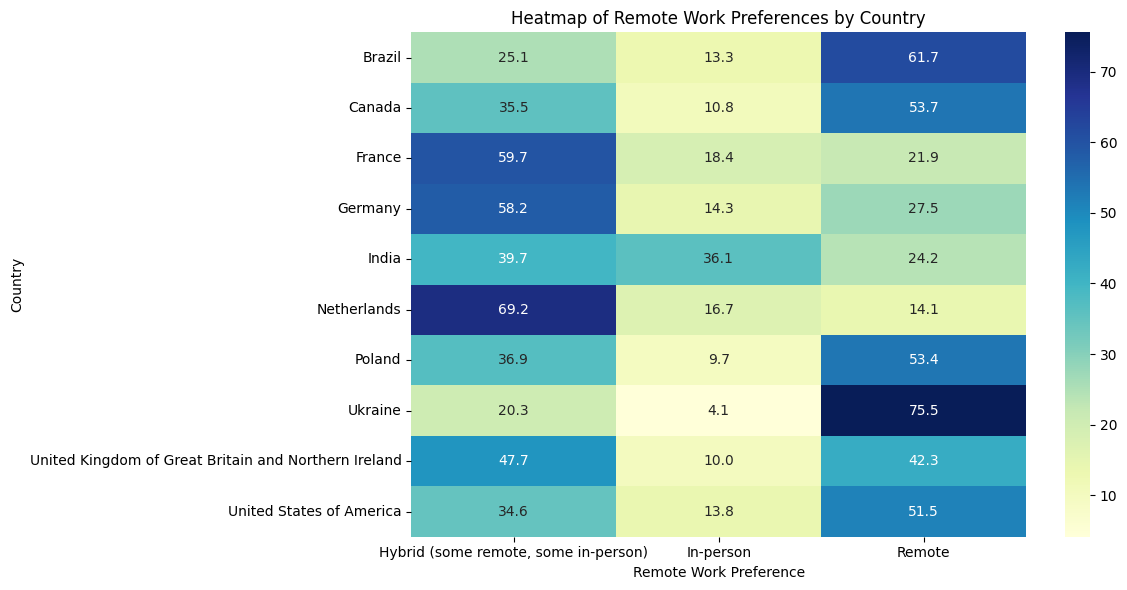

In [11]:
## Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Drop missing values
df_remote = df.dropna(subset=['RemoteWork', 'Country'])  # Replace 'Country' with 'Region' if needed

# Step 2: Create a cross-tab of RemoteWork vs Country
remote_region_ct = pd.crosstab(df_remote['Country'], df_remote['RemoteWork'], normalize='index') * 100

# Step 3: Select top N countries with most responses
top_countries = df_remote['Country'].value_counts().head(10).index
remote_top = remote_region_ct.loc[remote_region_ct.index.isin(top_countries)]
# Plot as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(remote_top, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap of Remote Work Preferences by Country')
plt.xlabel('Remote Work Preference')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [15]:
# Step 1: Convert YearsCodePro to numeric safely
def convert_experience(val):
    if val == "Less than 1 year":
        return 0.5
    elif val == "More than 50 years":
        return 51
    try:
        return float(val)
    except:
        return None

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_experience)

# Step 2: Map JobSat to numeric values
job_sat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df['JobSatNumeric'] = df['JobSat'].map(job_sat_mapping)

# Step 3: Drop missing values
df_corr = df.dropna(subset=['YearsCodePro', 'JobSatNumeric'])

# ✅ Check for minimum data
if len(df_corr) < 2:
    print("❌ Not enough data to compute correlation. Only", len(df_corr), "valid rows.")
else:
    # Step 4: Calculate correlations
    from scipy.stats import pearsonr, spearmanr
    pearson_corr, _ = pearsonr(df_corr['YearsCodePro'], df_corr['JobSatNumeric'])
    spearman_corr, _ = spearmanr(df_corr['YearsCodePro'], df_corr['JobSatNumeric'])

    print(f"📈 Pearson Correlation: {pearson_corr:.3f}")
    print(f"📈 Spearman Correlation: {spearman_corr:.3f}")


❌ Not enough data to compute correlation. Only 0 valid rows.


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


📊 Cross-tabulation: Employment Type by Education Level (%):
Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                               74.72   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      79.99   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   80.01   
Primary/elementary school                                         67.59   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                    81.87   
Secondary school (e.g. American high school, Ge...                59.08   
Some college/university study without earning a...                68.41   
Something else                                                    74.05   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       

/tmp/ipykernel_299/241756203.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


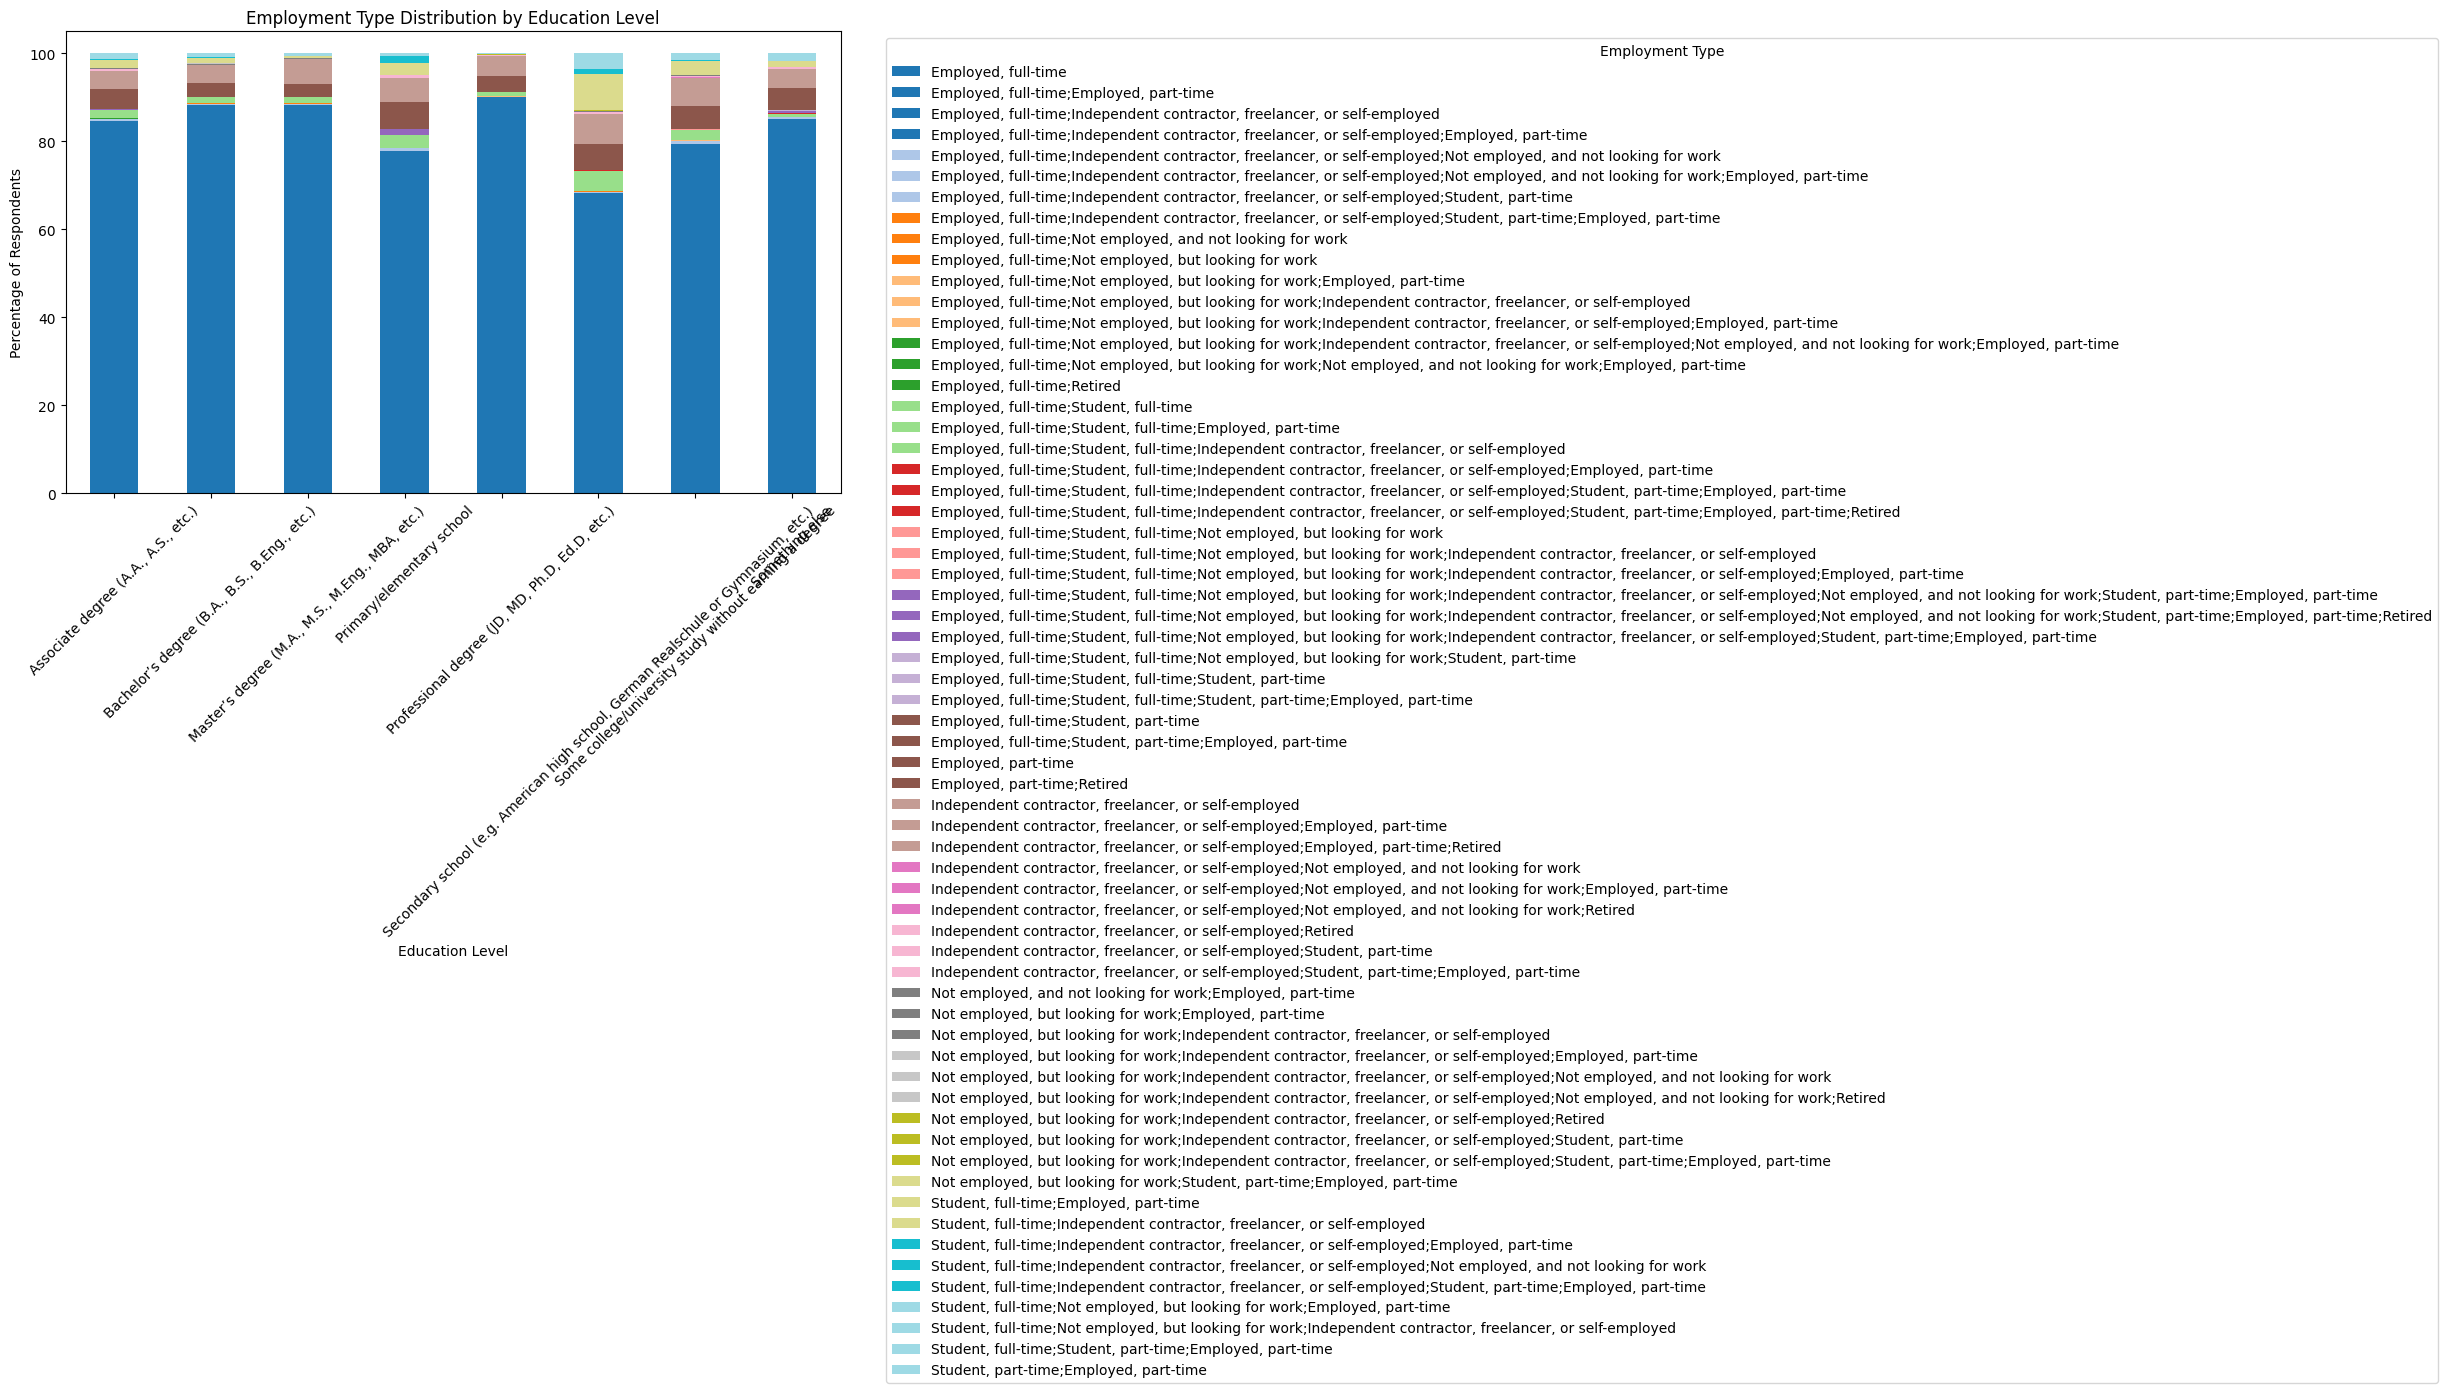

In [16]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop rows with missing values in Employment or EdLevel
df_cross = df.dropna(subset=['Employment', 'EdLevel'])

# Step 2: Create the cross-tabulation (normalized to get percentages)
cross_tab = pd.crosstab(df_cross['EdLevel'], df_cross['Employment'], normalize='index') * 100

# Step 3: Print the table (rounded)
print("📊 Cross-tabulation: Employment Type by Education Level (%):")
print(cross_tab.round(2))

# Step 4: Plot stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

plt.title('Employment Type Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage of Respondents')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here
df.to_csv("cleaned_survey_data.csv", index=False)

print("✅ Cleaned dataset saved as 'cleaned_survey_data.csv'")

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
